Nome: Christian da Rocha Iardino - RA: 002201700152

Nome: Lucas Alves da Silva - RA: 002201600803

Nome: Yan Strublic de Oliveira - RA: 002201601497

###Bibliografia

[1] WIKIPEDIA. Dirac delta function. In: Dirac delta function. [S. l.], 28 out. 2020. Disponível em: https://en.wikipedia.org/wiki/Dirac_delta_function#:~:text=In%20mathematics%2C%20the%20Dirac%20delta,introduced%20by%20physicist%20Paul%20Dirac.&text=As%20a%20distribution%2C%20the%20Dirac,to%20its%20value%20at%20zero. Acesso em: 2 nov. 2020.

[2] DYNAMICS AND CONTROL. Laplace Transforms. In: Dirac delta function. [S. l.], 4 out. 2020. Disponível em: https://apmonitor.com/pdc/index.php/Main/LaplaceTransforms. Acesso em: 2 nov. 2020.

[3] TUROTIALSPOINT. Laplace Transforms. In: Control Systems - Quick Guide: Control Systems - Introduction. [S. l.], 2019. Disponível em: https://www.tutorialspoint.com/control_systems/control_systems_quick_guide.htm. Acesso em: 2 nov. 2020.

## Equação
---

\begin{equation}
D_s = \frac{\pi^2}{4} \times (\rho + \frac{d\rho}{dt}) \times f \times \phi^3 
\end{equation}

Onde:

$D_s$ $\Rightarrow$ Material sendo dosado [$\frac{kg}{s}$].

$\rho$ $\Rightarrow$ Desidade do material sendo dosado [$\frac{kg}{m^3}$].

$f$ $\Rightarrow$ Hertz do motor que controla a rosca dosadora [$Hz$].

$\phi$ $\Rightarrow$ O diametro da saida do material [$m$].

Como utilizaremos tempo discreto podemos transformar a derivada em $\Delta$, portanto temos que:

\begin{equation}
D_s = \frac{\pi^2}{4} \times (\rho_i + \Delta \rho) \times f \times \phi^3 
\end{equation}

\begin{equation}
\Delta \rho = \rho_n - \rho_{n-1}
\end{equation}




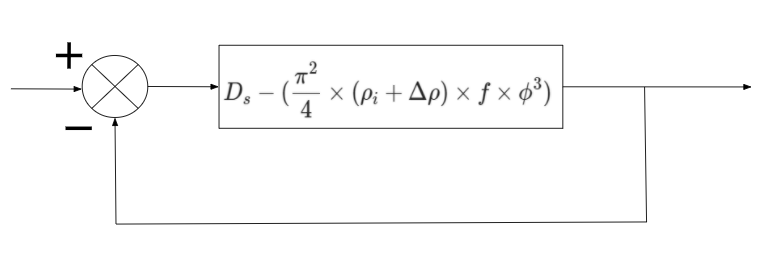

###Função de Transferencia

\begin{equation}
C(S) = (D_s - (\frac{\pi^2}{4} \times (\rho_i + \Delta \rho) \times S \times \phi^3)) \times R(S)
\end{equation}

Para facilitar a programação usaremos
\begin{equation}
k1 = (\frac{\pi^2}{4} \times (\rho_i + \Delta \rho) \times \phi^3))
\end{equation}

Portanto temos que:
\begin{equation}
C(S) = (D_s - k1 \times S) \times R(S)
\end{equation}

In [1]:
import random as rdm
import math
import matplotlib.pyplot as plt
import numpy as np
import sympy
from sympy.abc import s, t
from sympy.integrals import laplace_transform
from sympy.integrals import inverse_laplace_transform

In [2]:
def dirac_function(a, x):
  return (1/(pow(math.pi, 1/2)*a))*pow(math.e, -(pow(x, 2)/pow(a, 2)))

def derivada_dirac(a_d, x_d):
  h = 1/pow(10, 6)
  return (dirac_function(a_d + h, x_d) - dirac_function(a_d, x_d)) / h

def plotter(array_x, array_y):
  fig, ax = plt.subplots()
  ax.plot(array_x, array_y)

In [3]:
d_s_desejado = rdm.randrange(5000) / 1000
rho = rdm.randrange(200, 2600)
delta_rho = 0
f_atual = 60
dim =  rdm.choice([i/2 for i in range(1, 10)]) * 0.0254
k1 = (int((pow(math.pi, 2)/4) * (rho + delta_rho) * pow(dim, 3)*pow(10, 6)))/pow(10, 6)
print(k1)

0.011285


###Resposta a impulso
\begin{equation}
R(S) = 1
\end{equation}

In [4]:
inversa = inverse_laplace_transform(k1 * s, s, t)
print(inversa)
print("\nPortanto temos que a função é :\n c(t) = ", k1, "x d'(t)")

0.011285*InverseLaplaceTransform(s, s, t, _None)

Portanto temos que a função é :
 c(t) =  0.011285 x d'(t)


Onde a d'(t) ($\delta ' (t)$) é a derivada da função de Dirac (função impulso).

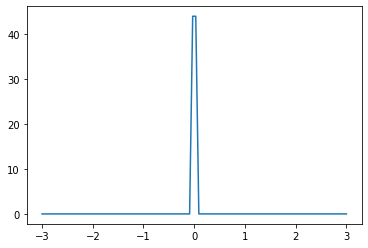

In [5]:
x_lim = [-3, 3]
x = np.linspace(min(x_lim), max(x_lim), 100)
y = [derivada_dirac(k1, x_) for x_ in x]
plotter(x, y)

###Resposta a sistema de primeira ordem
\begin{equation}
R(S) = 1/s
\end{equation}

In [6]:
inversa = inverse_laplace_transform(k1, s, t)
print(inversa)
print("\nPortanto temos que a função é :\n c(t) = ", k1, "x d(t)")

InverseLaplaceTransform(0.011285, s, t, _None)

Portanto temos que a função é :
 c(t) =  0.011285 x d(t)


Onde a d'(t) ($\delta(t)$) é a função de Dirac (função impulso).

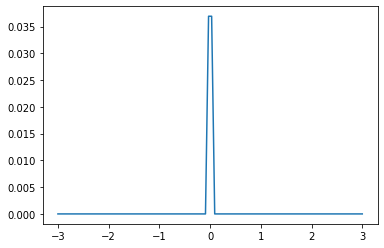

In [7]:
x_lim = [-3, 3]
x = np.linspace(min(x_lim), max(x_lim), 100)
y = [dirac_function(k1, x_) for x_ in x]
plotter(x, y)

###Resposta a Rampa
\begin{equation}
R(S) = 1/s^2
\end{equation}

In [8]:
inversa = inverse_laplace_transform(k1 / s, s, t)
print(inversa)
print("\nPortanto temos que a função é :\n c(t) = ", k1, "x t")

0.011285*Heaviside(t)

Portanto temos que a função é :
 c(t) =  0.011285 x t


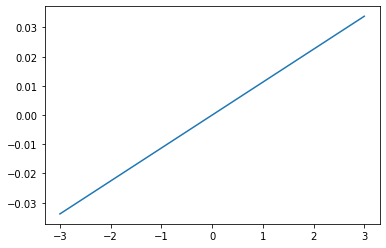

In [9]:
x_lim = [-3, 3]
x = np.linspace(min(x_lim), max(x_lim), 100)
y = [k1 * x_ for x_ in x]
plotter(x, y)

###Resposta a $s^n$
\begin{equation}
R(S) = 1/s^n
\end{equation}

onde 3 < n < 11.

In [20]:
for n in range(3, 11):
  inversa = inverse_laplace_transform(k1 / pow(s, n), s, t)
  print(inversa)
  print("\nPortanto temos que a função é :\n c(t) = ", str(inversa).split('*')[0], "x ( t ^", str(inversa).split('*')[3],")")
  print("____________________________________________________")

0.0056425*t**2*Heaviside(t)

Portanto temos que a função é :
 c(t) =  0.0056425 x ( t ^ 2 )
____________________________________________________
0.00188083333333333*t**3*Heaviside(t)

Portanto temos que a função é :
 c(t) =  0.00188083333333333 x ( t ^ 3 )
____________________________________________________
0.000470208333333333*t**4*Heaviside(t)

Portanto temos que a função é :
 c(t) =  0.000470208333333333 x ( t ^ 4 )
____________________________________________________
9.40416666666667e-5*t**5*Heaviside(t)

Portanto temos que a função é :
 c(t) =  9.40416666666667e-5 x ( t ^ 5 )
____________________________________________________
1.56736111111111e-5*t**6*Heaviside(t)

Portanto temos que a função é :
 c(t) =  1.56736111111111e-5 x ( t ^ 6 )
____________________________________________________
2.2390873015873e-6*t**7*Heaviside(t)

Portanto temos que a função é :
 c(t) =  2.2390873015873e-6 x ( t ^ 7 )
____________________________________________________
2.79885912698413e-7*t**8*Heavi

Graficos


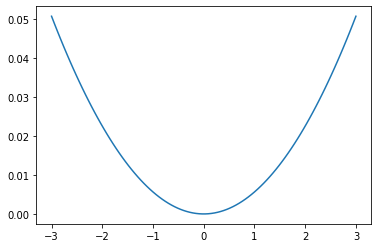

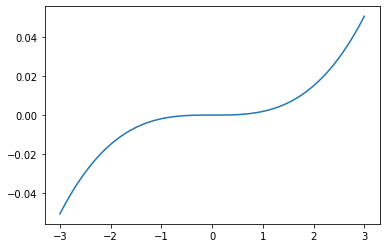

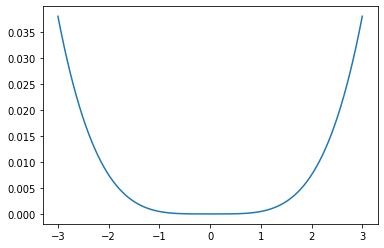

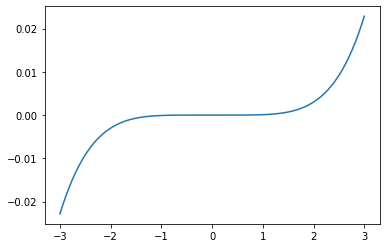

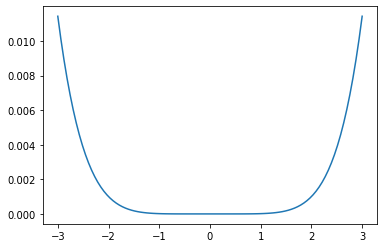

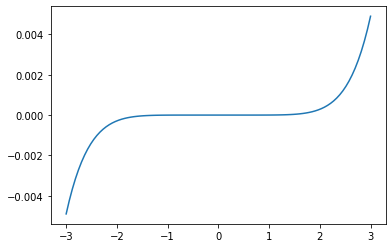

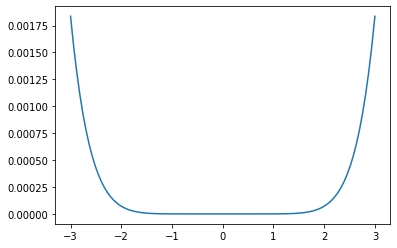

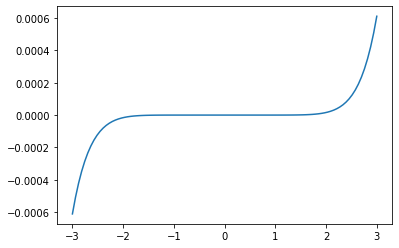

In [28]:
print("Graficos")
for n in range(3, 11):  
  inversa = inverse_laplace_transform(k1 / pow(s, n), s, t)
  x_lim = [-3, 3]
  x = np.linspace(min(x_lim), max(x_lim), 100)
  y = [float(str(inversa).split('*')[0]) * pow(x_, float(str(inversa).split('*')[3])) for x_ in x]
  plotter(x, y)

Para testar com outros valores de n digitio abaixo (codigo disponivel em https://github.com/Christianiardino/controle-Servo, arquivo controle_servo_meca_parte_2.ipynb).

26
Equação : 1.81884584898197e-26 * t ^ 25


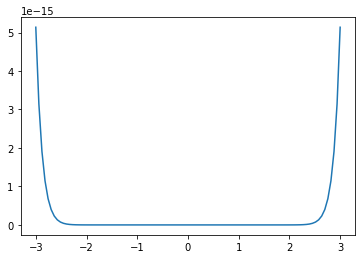

In [27]:
nn = input()
inversa = inverse_laplace_transform(k1 / pow(s, int(nn) - 1), s, t)
print("Equação :", str(inversa).split('*')[0], "* t ^", int(nn)-1)
x_lim = [-3, 3]
x = np.linspace(min(x_lim), max(x_lim), 100)
y = [float(str(inversa).split('*')[0]) * pow(x_, float(str(inversa).split('*')[3])) for x_ in x]
plotter(x, y)